# Análisis de altitudes de referencia y según altitud para capitales de provincia


La tabla de asignación de zonas climáticas que incluye el CTE DB-HE1 2013 indica en una columna una zona climática y una altitud de referencia para cada capital de provincia y a continuación una asignación de zonas climáticas.
Dicha zona y altitud corresponden a las estaciones meteorológicas que se han usado para establecer el clima de la localidad.

Si la selección de la zona climática de las capitales de provincia se realiza mediante el uso directo de la zona climática de referencia (la de la estación meteorológica) los resultados no siempre coinciden con los obtenidos empleando la altitud de la localidad. Para seleccionar esta altitud se han tomado los datos del nomenclator oficial del instituto nacional de estadística (procedentes del instituto geográfico nacional) pero en proyecto se podría seleccionar la altitud real a la que se sitúa el edificio, ya que algunas localidades pueden tener diferencias de altitud importantes dentro del mismo municipio.

El objetivo de este estudio es ver el impacto del uso de uno u otro método de selección de la zona climática para pensar el enfoque más adecuado para aclarar el modo de empleo de la tabla en el CTE, seguramente mediante un comentario.


In [1]:
%matplotlib inline
# dependencias para scipy (seaborn): aptitude install libatlas-base-dev gfortran python-pip python-dev build-essential


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 20
pd.options.display.max_rows = 25
sns.set_palette("deep", desat=.7)
sns.set_context(rc={"figure.figsize": (8, 4)})
# np.random.seed(9221999)


def f(x): return 0 if not x else float(x.replace(',', '.'))
def i(x): return 0 if not x else int(x.replace(',', '.'))


In [10]:
df = pd.read_csv('../data/ign/MUNICIPIOS.csv',
                 encoding='latin1',
                 sep=';',
                 decimal=',',
                 na_values=['', None, np.nan],
                 skiprows=1,
                 names=['COD_INE', 'ID_REL', 'COD_GEO', 'COD_PROV', 'PROVINCIA',
                        'NOMBRE_ACTUAL',
                        'POBLACION_MUNI', 'SUPERFICIE', 'PERIMETRO',
                        'COD_INE_CAPITAL', 'CAPITAL', 'POBLACION_CAPITAL',
                        'HOJA_MTN25_ETRS89', 'LONGITUD_ETRS89', 'LATITUD_ETRS89',
                        'ORIGENCOOR', 'ALTITUD', 'ORIGENALTITUD'],
                 dtype={'COD_INE': str,
                        'ID_REL': str,
                        'COD_GEO': str,
                        'COD_PROV': str,
                        'PROVINCIA': str,
                        'NOMBRE_ACTUAL': str,
                        'POBLACION_MUNI': int,
                        'SUPERFICIE': float,
                        'PERIMETRO': float,
                        'COD_INE_CAPITAL': str,
                        'CAPITAL': str,
                        'POBLACION_CAPITAL': int,
                        'HOJA_MTN25_ETRS89': str,
                        'LONGITUD_ETRS89': float,
                        'LATITUD_ETRS89': float,
                        'ORIGENCOOR': str,
                        'ALTITUD': float,
                        'ORIGENALTITUD': str
                        }
                 )


In [11]:
df.describe()


,POBLACION_MUNI,SUPERFICIE,PERIMETRO,POBLACION_CAPITAL,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD
count,8.131000e+03,8131.000000,8131.000000,8.131000e+03,8131.000000,8131.000000,8131.00000
mean,5.827710e+03,6207.743892,38622.854138,4.686579e+03,-3.107779,40.724919,612.87029
std,4.784572e+04,9203.001808,29067.228775,4.646979e+04,3.026899,2.121981,344.14851
min,3.000000e+00,2.578400,687.000000,0.000000e+00,-17.998381,27.703869,1.00000
25%,1.530000e+02,1841.452000,21806.500000,1.060000e+02,-5.122332,39.857703,332.50000
50%,5.230000e+02,3486.922900,31027.000000,3.440000e+02,-3.234478,41.183674,666.00000
75%,2.416000e+03,6886.720750,46483.500000,1.645500e+03,-1.128778,42.133101,858.00000
max,3.305408e+06,175022.910000,623580.000000,3.305408e+06,4.289666,43.740351,1695.00000


In [13]:
df.head()


,COD_INE,ID_REL,COD_GEO,COD_PROV,PROVINCIA,NOMBRE_ACTUAL,POBLACION_MUNI,SUPERFICIE,PERIMETRO,COD_INE_CAPITAL,CAPITAL,POBLACION_CAPITAL,HOJA_MTN25_ETRS89,LONGITUD_ETRS89,LATITUD_ETRS89,ORIGENCOOR,ALTITUD,ORIGENALTITUD
0,01001000000,1010014,01010,01,Araba/Álava,Alegría-Dulantzi,2925,1994.5872,35069.0,01001000101,Alegría-Dulantzi,2813,0113-3,-2.512437,42.839812,Mapa,568.0,MDT
1,01002000000,1010029,01020,01,Araba/Álava,Amurrio,10307,9629.6800,65381.0,01002000201,Amurrio,9221,0086-4,-3.000073,43.054278,Mapa,219.0,MDT
2,01003000000,1010035,01030,01,Araba/Álava,Aramaio,1456,7302.1000,42081.0,01003000601,Ibarra,799,0087-4,-2.565400,43.051197,Mapa,333.0,MDT
3,01004000000,1010040,01040,01,Araba/Álava,Artziniega,1809,2728.7300,22886.0,01004000101,Artziniega,1683,0086-1,-3.127917,43.120844,Mapa,210.0,MDT
4,01006000000,1010066,01060,01,Araba/Álava,Armiñón,231,1297.2700,24707.0,01006000101,Armiñón,112,0137-4,-2.871835,42.723262,Mapa,467.0,MDT


In [14]:
df.iloc[0]


COD_INE                   01001000000
ID_REL                        1010014
COD_GEO                         01010
COD_PROV                           01
PROVINCIA                 Araba/Álava
NOMBRE_ACTUAL        Alegría-Dulantzi
POBLACION_MUNI                   2925
SUPERFICIE                    1994.59
PERIMETRO                       35069
COD_INE_CAPITAL           01001000101
CAPITAL              Alegría-Dulantzi
POBLACION_CAPITAL                2813
HOJA_MTN25_ETRS89              0113-3
LONGITUD_ETRS89              -2.51244
LATITUD_ETRS89                42.8398
ORIGENCOOR                       Mapa
ALTITUD                           568
ORIGENALTITUD                     MDT
Name: 0, dtype: object

In [16]:
print(df[['COD_INE', 'NOMBRE_ACTUAL', 'PROVINCIA', 'ALTITUD']].head())
print(df[['COD_INE', 'NOMBRE_ACTUAL', 'PROVINCIA', 'ALTITUD']].tail())


       COD_INE     NOMBRE_ACTUAL    PROVINCIA  ALTITUD
0  01001000000  Alegría-Dulantzi  Araba/Álava    568.0
1  01002000000           Amurrio  Araba/Álava    219.0
2  01003000000           Aramaio  Araba/Álava    333.0
3  01004000000        Artziniega  Araba/Álava    210.0
4  01006000000           Armiñón  Araba/Álava    467.0
          COD_INE          NOMBRE_ACTUAL PROVINCIA  ALTITUD
8126  50901000000                   Biel  Zaragoza    755.0
8127  50902000000               Marracos  Zaragoza    413.0
8128  50903000000  Villamayor de Gállego  Zaragoza    232.0
8129  51001000000                  Ceuta     Ceuta     27.0
8130  52001000000                Melilla   Melilla      2.0


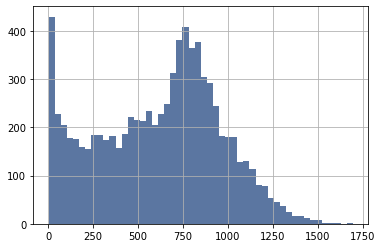

In [17]:
df.ALTITUD.hist(bins=50)


In [78]:
# Tabla de altitudes del CTE 2013
# Capital - ZC asignada, lista de ZC según rangos de alturas
provincias_HE2013 = [
    ['Albacete', 677, 'D3', [
        (-999, 450, 'C3'), (450, 950, 'D3'), (950, 9999, 'E1')]],
    ['Alacant/Alicante', 7, 'B4',
     [(-99, 250, 'B4'), (250, 700, 'C3'), (700, 9999, 'D3')]],
    ['Almería', 0, 'A4', [
        (-999, 100, 'A4'), (100, 250, 'B4'), (250, 400, 'B3'), (400, 800, 'C3'), (800, 9999, 'D3')]],
    ['Ávila', 1054, 'E1', [
        (-999, 550, 'D2'), (550, 850, 'D1'), (850, 9999, 'E1')]],
    ['Badajoz', 168, 'C4', [
        (-999, 400, 'C4'), (400, 450, 'C3'), (450, 9999, 'D3')]],
    ['Barcelona', 1, 'C2', [
        (-999, 250, 'C2'), (250, 450, 'D2'), (450, 750, 'D1'), (750, 9999, 'E1')]],
    ['Bilbao', 214, 'C1', [
        (-999, 250, 'C1'), (250, 9999, 'D1')]],
    ['Burgos', 861, 'E1', [
        (-999, 600, 'D1'), (600, 9999, 'E1')]],
    ['Cáceres', 385, 'C4', [
        (-999, 600, 'C4'), (600, 1050, 'D3'), (1050, 9999, 'E1')]],
    ['Cádiz', 0, 'A3', [(-999, 150, 'A3'), (150, 450, 'B3'),
                        (450, 600, 'C3'), (600, 850, 'C2'), (850, 9999, 'D2')]],
    ['Castelló de la Plana', 18, 'B3',
     [(-999, 50, 'B3'), (50, 500, 'C3'), (500, 600, 'D3'), (600, 1000, 'D2'), (1000, 9999, 'E1'), ()]],
    ['Ceuta', 0, 'B3', [(-999, 9999, 'B3')]],
    ['Ciudad Real', 630, 'D3', [
                         (-999, 450, 'C4'), (450, 500, 'C3'), (500, 9999, 'D3')]],
    ['Córdoba', 113, 'B4', [
        (-999, 150, 'B4'), (150, 550, 'C4'), (550, 9999, 'D3')]],
    ['A Coruña', 0, 'C1', [
        (-999, 200, 'C1'), (200, 9999, 'D1')]],
    ['Cuenca', 975, 'D2', [
        (-999, 800, 'D3'), (800, 1050, 'D2'), (1050, 9999, 'E1')]],
    ['Girona', 143, 'D2', [
        (-999, 100, 'C2'), (100, 600, 'D2'), (600, 9999, 'E1')]],
    ['Granada', 754, 'C3', [(-999, 50, 'A4'), (50, 350, 'B4'), (350, 600, 'C4'),
                            (600, 800, 'C3'), (800, 1300, 'D3'), (1300, 9999, 'E1')]],
    ['Guadalajara', 708, 'D3', [
                         (-999, 950, 'D3'), (950, 1000, 'D2'), (1000, 9999, 'E1')]],
    ['Huelva', 50, 'A4', [(-999, 50, 'A4'), (50, 150, 'B4'),
                          (150, 350, 'B3'), (350, 800, 'C3'), (800, 9999, 'D3')]],
    ['Huesca', 432, 'D2', [(-999, 200, 'C3'), (200, 400, 'D3'),
                           (400, 700, 'D2'), (700, 9999, 'E1')]],
    ['Jaén', 436, 'C4', [(-999, 350, 'B4'), (350, 750, 'C4'),
                         (750, 1250, 'D3'), (1250, 9999, 'E1')]],
    ['León', 346, 'E1', [(-999, 9999, 'E1')]],
    ['Lleida', 131, 'D3', [
        (-999, 100, 'C3'), (100, 600, 'D3'), (600, 9999, 'E1')]],
    ['Logroño', 379, 'D2', [
        (-999, 200, 'C2'), (200, 700, 'D2'), (700, 9999, 'E1')]],
    ['Lugo', 412, 'D1', [
        (-999, 500, 'D1'), (500, 9999, 'E1')]],
    ['Madrid', 589, 'D3', [(-999, 500, 'C3'), (500, 950, 'D3'),
                           (950, 1000, 'D2'), (1000, 9999, 'E1')]],
    ['Málaga', 0, 'A3', [
        (-999, 300, 'B3'), (300, 700, 'C3'), (700, 9999, 'D3')]],
    ['Melilla', 130, 'A3', [(-999, 9999, 'A3')]],
    ['Murcia', 25, 'B3', [
        (-999, 100, 'B3'), (100, 550, 'C3'), (550, 9999, 'D3')]],
    ['Ourense', 327, 'D2', [
        (-999, 150, 'C3'), (150, 300, 'C2'), (300, 800, 'D2'), (800, 9999, 'E1')]],
    ['Oviedo', 214, 'D1', [
        (-999, 50, 'C1'), (50, 550, 'D1'), (550, 9999, 'E1')]],
    ['Palencia', 722, 'D1', [
        (-999, 800, 'D1'), (800, 9999, 'E1')]],
    ['Palma', 1, 'B3', [
        (-999, 250, 'B3'), (250, 9999, 'C3')]],
    ['Pamplona/Iruña', 456, 'D1',
     [(-999, 100, 'C2'), (100, 300, 'D2'), (300, 600, 'D1'), (600, 9999, 'E1')]],
    ['Pontevedra', 77, 'C1', [
        (-999, 350, 'C1'), (350, 9999, 'D1')]],
    ['Salamanca', 770, 'D2', [
        (-999, 800, 'D2'), (800, 9999, 'E1')]],
    ['Donostia/San Sebastián', 5, 'D1',
     [(-999, 400, 'D1'), (400, 9999, 'E1')]],
    ['Santander', 1, 'C1', [
        (-999, 150, 'C1'), (150, 650, 'D1'), (650, 9999, 'E1')]],
    ['Segovia', 1013, 'D2', [
        (-999, 1000, 'D2'), (1000, 9999, 'E1'), ()]],
    ['Sevilla', 9, 'B4', [
        (-999, 200, 'B4'), (200, 9999, 'C4')]],
    ['Soria', 984, 'E1', [
        (-999, 750, 'D2'), (750, 800, 'D1'), (800, 9999, 'E1')]],
    ['Tarragona', 1, 'B3', [
        (-999, 50, 'B3'), (50, 500, 'C3'), (500, 9999, 'D3')]],
    ['Teruel', 995, 'D2', [(-999, 450, 'C3'), (450, 500, 'C2'),
                           (500, 1000, 'D2'), (1000, 9999, 'E1')]],
    ['Toledo', 445, 'C4', [
        (-999, 500, 'C4'), (500, 9999, 'D3')]],
    ['València', 8, 'B3', [(-999, 50, 'B3'), (50, 500, 'C3'),
                           (500, 950, 'D2'), (950, 9999, 'E1')]],
    ['Valladolid', 704, 'D2', [
        (-999, 800, 'D2'), (800, 9999, 'E1')]],
    ['Vitoria-Gasteiz', 512, 'D1',
     [(-999, 500, 'D1'), (500, 9999, 'E1')]],
    ['Zamora', 617, 'D2', [
        (-999, 800, 'D2'), (800, 9999, 'E1')]],
    ['Zaragoza', 207, 'D3', [
        (-999, 200, 'C3'), (200, 650, 'D3'), (650, 9999, 'E1')]],
    ['Las Palmas de Gran Canaria', 114, 'a3', [
        (-999, 350, 'a3'), (350, 750, 'A2'), (750, 1000, 'B2'), (1000, 9999, 'C2')]],
    ['Santa Cruz de Tenerife', 0, 'a3', [
        (-999, 350, 'a3'), (350, 750, 'A2'), (750, 1000, 'B2'), (1000, 9999, 'C2')]],
]


In [79]:
# Tabla de altitudes del CTE HE 2019
# Capital - ZC asignada, lista de ZC según rangos de alturas
# TODO: rehacer por provincias, no capitales de provincia...

provincias = [
    # 
    ['Albacete', 677, 'D3', [
        (-999, 450, 'C3'), (450, 950, 'D3'), (950, 9999, 'E1')]],
    ['Alacant/Alicante', 7, 'B4',
     [(-99, 250, 'B4'), (250, 700, 'C3'), (700, 9999, 'D3')]],
    ['Almería', 0, 'A4', [(-999, 100, 'A4'), (100, 250, 'B4'),
                          (250, 400, 'B3'), (400, 800, 'C3'), (800, 9999, 'D3')]],
    ['Ávila', 1054, 'E1', [
        (-999, 550, 'D2'), (550, 850, 'D1'), (850, 9999, 'E1')]],
    ['Badajoz', 168, 'C4', [
        (-999, 400, 'C4'), (400, 450, 'C3'), (450, 9999, 'D3')]],
    ['Barcelona', 1, 'C2', [
        (-999, 250, 'C2'), (250, 450, 'D2'), (450, 750, 'D1'), (750, 9999, 'E1')]],
    ['Bilbao', 214, 'C1', [
        (-999, 250, 'C1'), (250, 9999, 'D1')]],  # Bizkaia
    ['Burgos', 861, 'E1', [(-999, 600, 'D1'), (600, 9999, 'E1')]],
    ['Cáceres', 385, 'C4', [
        (-999, 600, 'C4'), (600, 1050, 'D3'), (1050, 9999, 'E1')]],
    ['Cádiz', 0, 'A3', [(-999, 150, 'A3'), (150, 450, 'B3'),
                        (450, 600, 'C3'), (600, 850, 'C2'), (850, 9999, 'D2')]],
    ['Castelló de la Plana', 18, 'B3',
     [(-999, 50, 'B3'), (50, 500, 'C3'), (500, 600, 'D3'), (600, 1000, 'D2'), (1000, 9999, 'E1'), ()]],
    ['Ceuta', 0, 'B3', [(-999, 9999, 'B3')]],
    ['Ciudad Real', 630, 'D3', [
        (-999, 450, 'C4'), (450, 500, 'C3'), (500, 9999, 'D3')]],
    ['Córdoba', 113, 'B4', [
        (-999, 150, 'B4'), (150, 550, 'C4'), (550, 9999, 'D3')]],
    ['A Coruña', 0, 'C1', [(-999, 200, 'C1'), (200, 9999, 'D1')]],
    ['Cuenca', 975, 'D2', [
        (-999, 800, 'D3'), (800, 1050, 'D2'), (1050, 9999, 'E1')]],
    ['Girona', 143, 'D2', [
        (-999, 100, 'C2'), (100, 600, 'D2'), (600, 9999, 'E1')]],
    ['Granada', 754, 'C3', [(-999, 50, 'A4'), (50, 350, 'B4'), (350, 600, 'C4'),
                            (600, 800, 'C3'), (800, 1300, 'D3'), (1300, 9999, 'E1')]],
    ['Guadalajara', 708, 'D3', [
        (-999, 950, 'D3'), (950, 1000, 'D2'), (1000, 9999, 'E1')]],
    ['Huelva', 50, 'A4', [(-999, 50, 'A4'), (50, 150, 'B4'),
                          (150, 350, 'B3'), (350, 800, 'C3'), (800, 9999, 'D3')]],
    ['Huesca', 432, 'D2', [
        (-999, 200, 'C3'), (200, 400, 'D3'), (400, 700, 'D2'), (700, 9999, 'E1')]],
    ['Jaén', 436, 'C4', [
                  (-999, 350, 'B4'), (350, 750, 'C4'), (750, 1250, 'D3'), (1250, 9999, 'E1')]],
    ['León', 346, 'E1', [(-999, 9999, 'E1')]],
    ['Lleida', 131, 'D3', [
        (-999, 100, 'C3'), (100, 600, 'D3'), (600, 9999, 'E1')]],
    ['Logroño', 379, 'D2', [
        (-999, 200, 'C2'), (200, 700, 'D2'), (700, 9999, 'E1')]],  # Rioja, La
    ['Lugo', 412, 'D1', [(-999, 500, 'D1'), (500, 9999, 'E1')]],
    ['Madrid', 589, 'D3', [
        (-999, 500, 'C3'), (500, 950, 'D3'), (950, 1000, 'D2'), (1000, 9999, 'E1')]],
    ['Málaga', 0, 'A3', [
                  (-999, 100, 'A3'), (100, 300, 'B3'), (300, 700, 'C3'), (700, 9999, 'D3')]],
    ['Melilla', 130, 'A3', [(-999, 9999, 'A3')]],
    ['Murcia', 25, 'B3', [
        (-999, 100, 'B3'), (100, 550, 'C3'), (550, 9999, 'D3')]],
    ['Ourense', 327, 'D2', [
        (-999, 150, 'C3'), (150, 300, 'C2'), (300, 800, 'D2'), (800, 9999, 'E1')]],
    # Asturias
    ['Oviedo', 214, 'D1', [
        (-999, 50, 'C1'), (50, 550, 'D1'), (550, 9999, 'E1')]],
    ['Palencia', 722, 'D1', [(-999, 800, 'D1'), (800, 9999, 'E1')]],
    ['Palma', 1, 'B3', [
        (-999, 250, 'B3'), (250, 9999, 'C3')]],  # Balears, Illes
    ['Pamplona/Iruña', 456, 'D1',
     [(-999, 100, 'C2'), (100, 350, 'D2'), (350, 600, 'D1'), (600, 9999, 'E1')]],  # Navarra
    ['Pontevedra', 77, 'C1', [(-999, 350, 'C1'), (350, 9999, 'D1')]],
    ['Salamanca', 770, 'D2', [(-999, 850, 'D2'), (850, 9999, 'E1')]],
    ['Donostia/San Sebastián', 5, 'D1',
     [(-999, 400, 'D1'), (400, 9999, 'E1')]],
    ['Santander', 1, 'C1', [
        (-999, 150, 'C1'), (150, 650, 'D1'), (650, 9999, 'E1')]],  # Cantabria
    ['Segovia', 1013, 'D2', [
        (-999, 1050, 'D2'), (1050, 9999, 'E1'), ()]],
    ['Sevilla', 9, 'B4', [(-999, 200, 'B4'), (200, 9999, 'C4')]],
    ['Soria', 984, 'E1', [
        (-999, 750, 'D2'), (750, 800, 'D1'), (800, 9999, 'E1')]],
    ['Tarragona', 1, 'B3', [
        (-999, 100, 'B3'), (100, 500, 'C3'), (500, 9999, 'D3')]],
    ['Teruel', 995, 'D2', [
        (-999, 450, 'C3'), (450, 500, 'C2'), (500, 1000, 'D2'), (1000, 9999, 'E1')]],
    ['Toledo', 445, 'C4', [(-999, 500, 'C4'), (500, 9999, 'D3')]],
    ['València', 8, 'B3', [
        (-999, 50, 'B3'), (50, 500, 'C3'), (500, 950, 'D2'), (950, 9999, 'E1')]],
    ['Valladolid', 704, 'D2', [
        (-999, 800, 'D2'), (800, 9999, 'E1')]],
    ['Vitoria-Gasteiz', 512, 'D1',
     [(-999, 600, 'D1'), (600, 9999, 'E1')]],  # Araba/Álava
    ['Zamora', 617, 'D2', [(-999, 800, 'D2'), (800, 9999, 'E1')]],
    ['Zaragoza', 207, 'D3', [
        (-999, 200, 'C3'), (200, 650, 'D3'), (650, 9999, 'E1')]],
    ['Las Palmas de Gran Canaria', 114, 'a3', [
        (-999, 350, 'a3'), (350, 750, 'A2'), (750, 1000, 'B2'), (1000, 9999, 'C2')]],  # Palmas, Las
    ['Santa Cruz de Tenerife', 0, 'a3', [
        (-999, 350, 'a3'), (350, 750, 'A2'), (750, 1000, 'B2'), (1000, 9999, 'C2')]],
]


In [80]:
prov_to_capital = {
    'Albacete': 'Albacete',
    'Araba/Álava': 'Vitoria-Gasteiz',
    'Alacant/Alicante': 'Alacant/Alicante',
    'Almería': 'Almería',
    'Asturias': 'Oviedo',
    'Ávila': 'Ávila',
    'Badajoz': 'Badajoz',
    'Barcelona': 'Barcelona',
    'Bizkaia': 'Bilbao',
    'Burgos': 'Burgos',
    'Cáceres': 'Cáceres',
    'Cádiz': 'Cádiz','Cantabria': 'Santander',
    'Castelló/Castellón': 'Castelló de la Plana',
    'Ceuta': 'Ceuta',
    'Ciudad Real': 'Ciudad Real',
    'Córdoba': 'Córdoba',
    'A Coruña': 'A Coruña',
    'Cuenca': 'Cuenca',
    'Gipuzkoa': 'Donostia/San Sebastián',
    'Girona': 'Girona',
    'Granada': 'Granada',
    'Guadalajara': 'Guadalajara',
    'Huelva': 'Huelva',
    'Huesca': 'Huesca',
    'Illes Balears': 'Palma',
    'Jaén': 'Jaén',
    'León': 'León',
    'Lleida': 'Lleida',
    'Lugo': 'Lugo',
    'Madrid': 'Madrid',
    'Málaga': 'Málaga',
    'Melilla': 'Melilla',
    'Murcia': 'Murcia',
    'Navarra': 'Pamplona/Iruña',
    'Ourense': 'Ourense',
    'Palencia': 'Palencia',
    'Las Palmas': 'Las Palmas de Gran Canaria',
    'Pontevedra': 'Pontevedra',
    'La Rioja': 'Logroño',
    'Salamanca': 'Salamanca',
    'Santa Cruz de Tenerife': 'Santa Cruz de Tenerife',
    'Segovia': 'Segovia',
    'Sevilla': 'Sevilla',
    'Soria': 'Soria',
    'Tarragona': 'Tarragona',
    'Teruel': 'Teruel',
    'Toledo': 'Toledo',
    'València/Valencia': 'València',
    'Valladolid': 'Valladolid',
    'Zamora': 'Zamora',
    'Zaragoza': 'Zaragoza'
}

In [81]:
def findzc(alt, rangoslist):
    """Devuelve zona climática según altitud alt para los rangos en rangoslist"""
    for minv, maxv, zc in rangoslist:
        if minv <= alt < maxv:
            return zc


capranges = {loc: rangos for loc, altref, zccap, rangos in provincias}

def findzcalt(alt, provincia):
    """Devuelve zona climática para una altitud en la provincia dada"""
    capital = prov_to_capital[provincia]
    ranges = capranges[capital]
    return findzc(alt, ranges)

# Rellenamos la columna ZC_CTE_2019 con los valores calculados usando la tabla con la altura de la localidad
df['ZC_CTE_2019'] = df.apply(
    lambda x: findzcalt(x['ALTITUD'], x['PROVINCIA']), 1)
df['ZCI_CTE_2019'] = df.apply(lambda x: x['ZC_CTE_2019'][0], 1)
df['ZCV_CTE_2019'] = df.apply(lambda x: x['ZC_CTE_2019'][1], 1)


In [82]:
# Guardamos pickle para leer y hacer mapas
df.to_pickle('munidata.pk1')


## Zonificación de capitales de provincia


In [83]:
print("Zonificación de capitales de provincia según tabla DB_HE vs según altitud oficial")
print()
print("%-42s%8s %6s %8s %6s %6s" %
      ('Capital', 'alt_ref', 'ZC_ref', 'alt', 'ZC_alt', 'Cambia'))
print("-"*79)
for loc, altref, zccap, rangos in provincias:
    fila = df[df['NOMBRE_ACTUAL'] == loc]
    if any(fila):
        if fila.size < 1:
            print("No hay datos para %s" % loc)
        datos = fila.iloc[0]
        altura = datos['ALTITUD']
        zccalc = findzc(altura, rangos).strip()
        cambia = '*' if zccalc != zccap else ''
        cambia = cambia + '+' if altref != altura else cambia
        print(u"{:<42s}{:>8.0f} {:^6s} {:>8.0f} {:^6s} {:^6s}".format(
            loc.strip(),
            altref,
            zccap,
            altura,
            zccalc,
            cambia))
    else:
        print(loc + '******************')


Zonificación de capitales de provincia según tabla DB_HE vs según altitud oficial

Capital                                    alt_ref ZC_ref      alt ZC_alt Cambia
-------------------------------------------------------------------------------
Albacete                                       677   D3        681   D3     +   
Alacant/Alicante                                 7   B4          5   B4     +   
Almería                                          0   A4         16   A4     +   
Ávila                                         1054   E1       1131   E1     +   
Badajoz                                        168   C4        182   C4     +   
Barcelona                                        1   C2         13   C2     +   
Bilbao                                         214   C1          6   C1     +   
Burgos                                         861   E1        859   E1     +   
Cáceres                                        385   C4        457   C4     +   
Cádiz                      

In [27]:
df.to_csv('./resultados.csv')


# Zonas climáticas municipios

Zonificación según tabla DB-HE por altitudes


In [30]:
municipios = df[['NOMBRE_ACTUAL', 'PROVINCIA', 'CAPI_PROV', 'ALTITUD',
                 'ZC_DBHE_ALT', 'ZCI', 'ZCV', 'POBLACION_MUNI', 'COD_INE']]


In [31]:
# cinco cifras de código del atlas de fomento
municipios['CODIGOFOM'] = df.COD_INE.str[:5]


<ipython-input-31-deed501aef91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipios['CODIGOFOM'] = df.COD_INE.str[:5] # cinco cifras de código del atlas de fomento


In [32]:
municipios.to_csv('./zc_localidades.csv')


In [25]:
# Sería interesante ver densidades además de frecuencias, también por poblaciones...


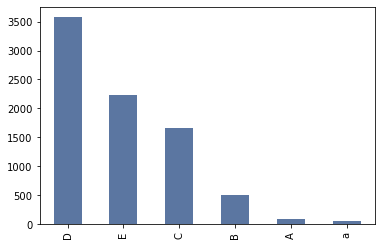

In [33]:
df.ZCI.value_counts().plot(kind="bar")


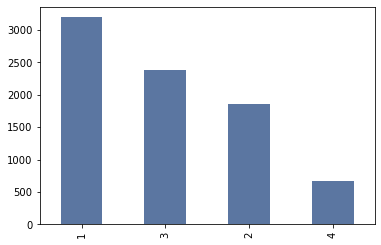

In [34]:
df.ZCV.value_counts().plot(kind="bar")


In [35]:
data = df[['NOMBRE_ACTUAL', 'PROVINCIA', 'CAPI_PROV', 'ALTURA',
           'ZC_DBHE_ALT', 'ZCI', 'ZCV',
           'LONGITUD_ETRS89/REGCAN95', 'LATITUD_ETRS89/REGCAN95', 'POBLACION_MUNI']].copy()
data['SCI'] = data.apply(
    lambda x: ['a', 'A', 'B', 'C', 'D', 'E'].index(x['ZCI'].strip()), 1)
data['SCV'] = data.apply(
    lambda x: ['1', '2', '3', '4'].index(x['ZCV'].strip()), 1)
# print data.irow(0)['ZCI']
peninsula = data[df.LATITUD_ED50 > 34]
canarias = data[df.LATITUD_ED50 <= 34]
print(len(peninsula))
print(len(canarias))


8029
88


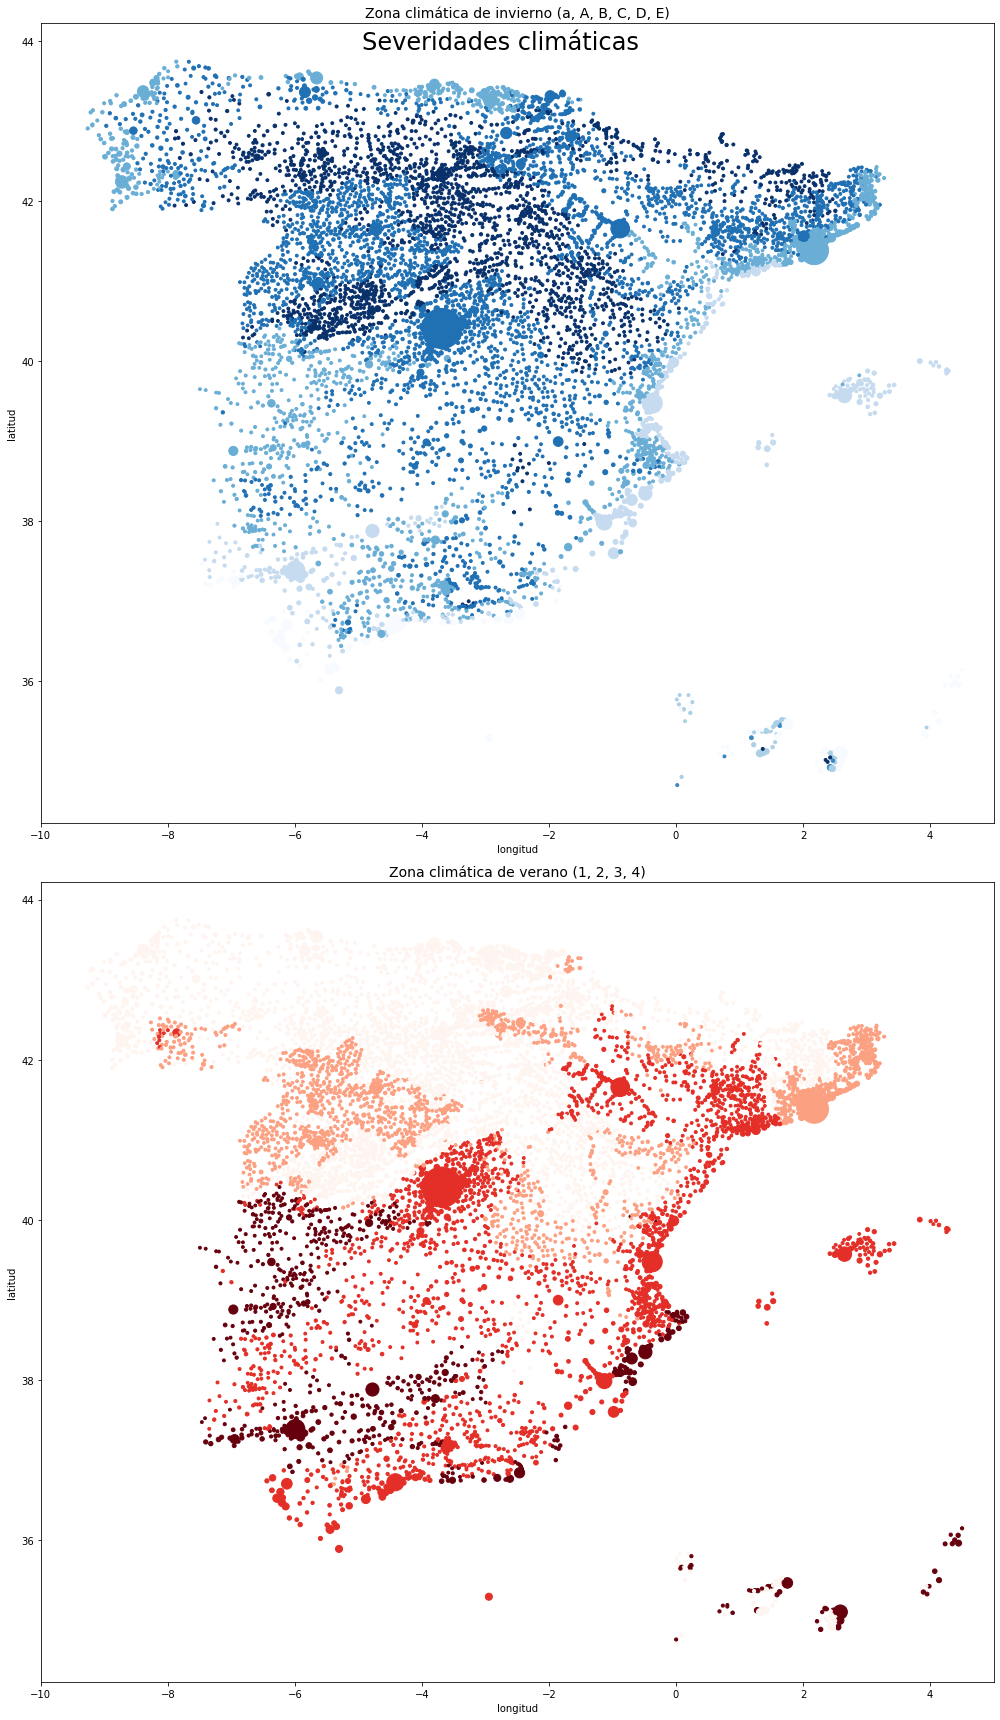

In [36]:
fig = plt.figure(figsize=(14, 24))
fig.suptitle(u'Severidades climáticas', size=24)
fig.subplots_adjust(top=0.95, hspace=0.1)
gs = mpl.gridspec.GridSpec(2, 1)  # , width_ratios=[3, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0, sharey=ax0)

# ax0.axis('equal')
ax0.set_xlim([-10, 5])
#ax0.set_ylim([30, 50])
ax0.set_ylabel('latitud')
ax0.set_xlabel('longitud')
ax0.set_title(u'Zona climática de invierno (a, A, B, C, D, E)', size=14)
ax1.set_ylabel('latitud')
ax1.set_xlabel('longitud')
ax1.set_title(u'Zona climática de verano (1, 2, 3, 4)', size=14)
#ax1.axis('equal', adjustable='box')
#ax2.axis('equal', adjustable='box')
#ax3.axis('equal', adjustable='box')

ax0.scatter(peninsula['LONGITUD_ETRS89/REGCAN95'],
            peninsula['LATITUD_ETRS89/REGCAN95'],
            c=peninsula.SCI,
            s=8.0+peninsula['POBLACION_MUNI']/2000.0,
            cmap=mpl.cm.Blues)

#xx = peninsula['LONGITUD_ETRS89/REGCAN95']
#yy = peninsula['LATITUD_ETRS89/REGCAN95']
#newxdata, newydata = np.meshgrid(xx, yy)
#newcolordata, zz = np.meshgrid(peninsula['SCI'].values, xx)
# ax0.pcolormesh(newxdata, newydata, newcolordata)#, s=5, cmap=mpl.cm.Reds)

ax0.scatter(canarias['LONGITUD_ETRS89/REGCAN95']+18,
            canarias['LATITUD_ETRS89/REGCAN95']+7,
            c=canarias.SCI,
            s=8.0+canarias['POBLACION_MUNI']/2000.0,
            cmap=mpl.cm.Blues)

ax1.scatter(peninsula['LONGITUD_ETRS89/REGCAN95'],
            peninsula['LATITUD_ETRS89/REGCAN95'],
            c=peninsula.SCV,
            s=8.0+peninsula['POBLACION_MUNI']/2000.0,
            cmap=mpl.cm.Reds)

ax1.scatter(canarias['LONGITUD_ETRS89/REGCAN95']+18,
            canarias['LATITUD_ETRS89/REGCAN95']+7,
            c=canarias.SCV,
            s=8.0+canarias['POBLACION_MUNI']/2000.0,
            cmap=mpl.cm.Reds)

fig.tight_layout()
fig.savefig('./mapaszc.png')


In [30]:
import scipy.interpolate

x = peninsula['LONGITUD_ETRS89/REGCAN95'].values
y = peninsula['LATITUD_ETRS89/REGCAN95'].values
values = peninsula['SCI'].values

xi = np.linspace(x.min(), x.max(), 300)
yi = np.linspace(y.min(), y.max(), 300)

# Ver mejor kneighbours
zi = scipy.interpolate.griddata(
    (x, y), values, (xi[None, :], yi[:, None]), method='nearest')


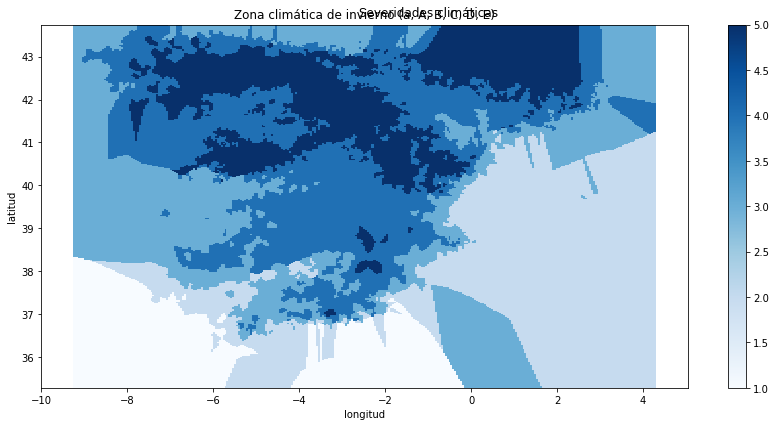

In [31]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle(u'Severidades climáticas')
gs = mpl.gridspec.GridSpec(1, 1)  # , width_ratios=[3, 1])
ax0 = plt.subplot(gs[0])
ax0.axis('equal')

ax0.set_ylabel('latitud')
ax0.set_xlabel('longitud')
ax0.set_title(u'Zona climática de invierno (a, A, B, C, D, E)')

m = ax0.pcolormesh(xi, yi, zi, cmap=mpl.cm.Blues)
fig.colorbar(m, ax=ax0)

fig.tight_layout()
# fig.savefig('./mapaszc.png')


Ver cómo dibujar en mapas con matplotlib y Basemap: http://matplotlib.org/basemap/users/examples.html


## Histogramas por población


In [32]:
grouped_pen = peninsula[['ZC_DBHE_ALT',
                         'POBLACION_MUNI']].groupby('ZC_DBHE_ALT')
pobclimas_pen = grouped_pen.agg(np.sum)
pob_pen = pobclimas_pen.sum()

grouped_can = canarias[['ZC_DBHE_ALT',
                        'POBLACION_MUNI']].groupby('ZC_DBHE_ALT')
pobclimas_can = grouped_can.agg(np.sum)
pob_can = pobclimas_can.sum()

pob_total = pob_pen + pob_can

print(pob_total)


POBLACION_MUNI    47124448
dtype: int64


### Porcentajes de población de la península situados en cada zona climática


             POBLACION_MUNI
ZC_DBHE_ALT                
A3                 2.469400
A4                 1.796407
B3                13.791790
B4                 8.501494
C1                 8.450673
C2                11.382977
C3                 6.613068
C4                 4.251337
D1                 6.134966
D2                 5.716810
D3                22.004699
E1                 4.390456
POBLACION_MUNI    45005769
dtype: int64


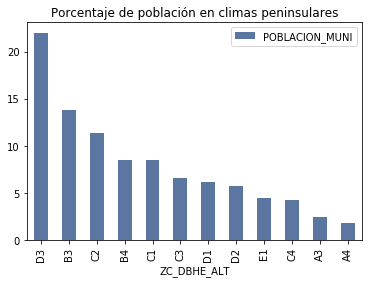

In [33]:
pobclimas_pen_pct = 100.0 * pobclimas_pen / pob_total
print(pobclimas_pen_pct)
print(pob_pen)
pobclimas_pen_pct.sort_values('POBLACION_MUNI', ascending=False).plot(
    kind='bar', title=u'Porcentaje de población en climas peninsulares')


### Porcentajes de población canaria situados en cada zona climática


             POBLACION_MUNI
ZC_DBHE_ALT                
A2                 1.346511
B2                 0.209042
C2                 0.018958
a3                 2.921411
POBLACION_MUNI    2118679
dtype: int64


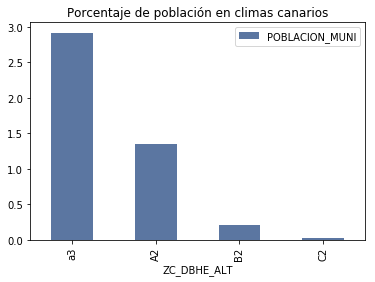

In [34]:
pobclimas_can_pct = 100.0 * pobclimas_can / pob_total
print(pobclimas_can_pct)
print(pob_can)
pobclimas_can_pct.sort_values('POBLACION_MUNI', ascending=False).plot(
    kind='bar', title=u'Porcentaje de población en climas canarios')
